# Korrelationsanalyse

Was ergibt eine Korrelationsanalyse der Fragebogen-Daten? Gibt es Fragen, die so stark
korrelieren, dass wir sie uns hätten sparen können? Greift einige (für euch) interessante
Korrelationen heraus, die eurer Meinung nach auf interessante Zusammenhänge hindeuten
könnten ("Personen die so sind ... sind oft auch so/ ... sind oft nicht so"). Stellt einige dieser von
euch ausgewählten Feature-Paare auch noch einmal graphisch dar (z.B. über einen Scatter-Plot).

***

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sb  
import matplotlib.pyplot as plt 

In [2]:
file_name = "./data/survery_data_annonymized_230626_clean.csv"
data = pd.read_csv(file_name)

## Korrelationsmatrix
Zuerst erstellen wir mit Hilfe von `.corr()` eine Korrelationsmatrix aller numerischen Feature. Diese Methode verwendet standardmäßig den Pearson-Korrelationskoeffizient (normiert).

<AxesSubplot:title={'center':'Korrelationsmatrix'}>

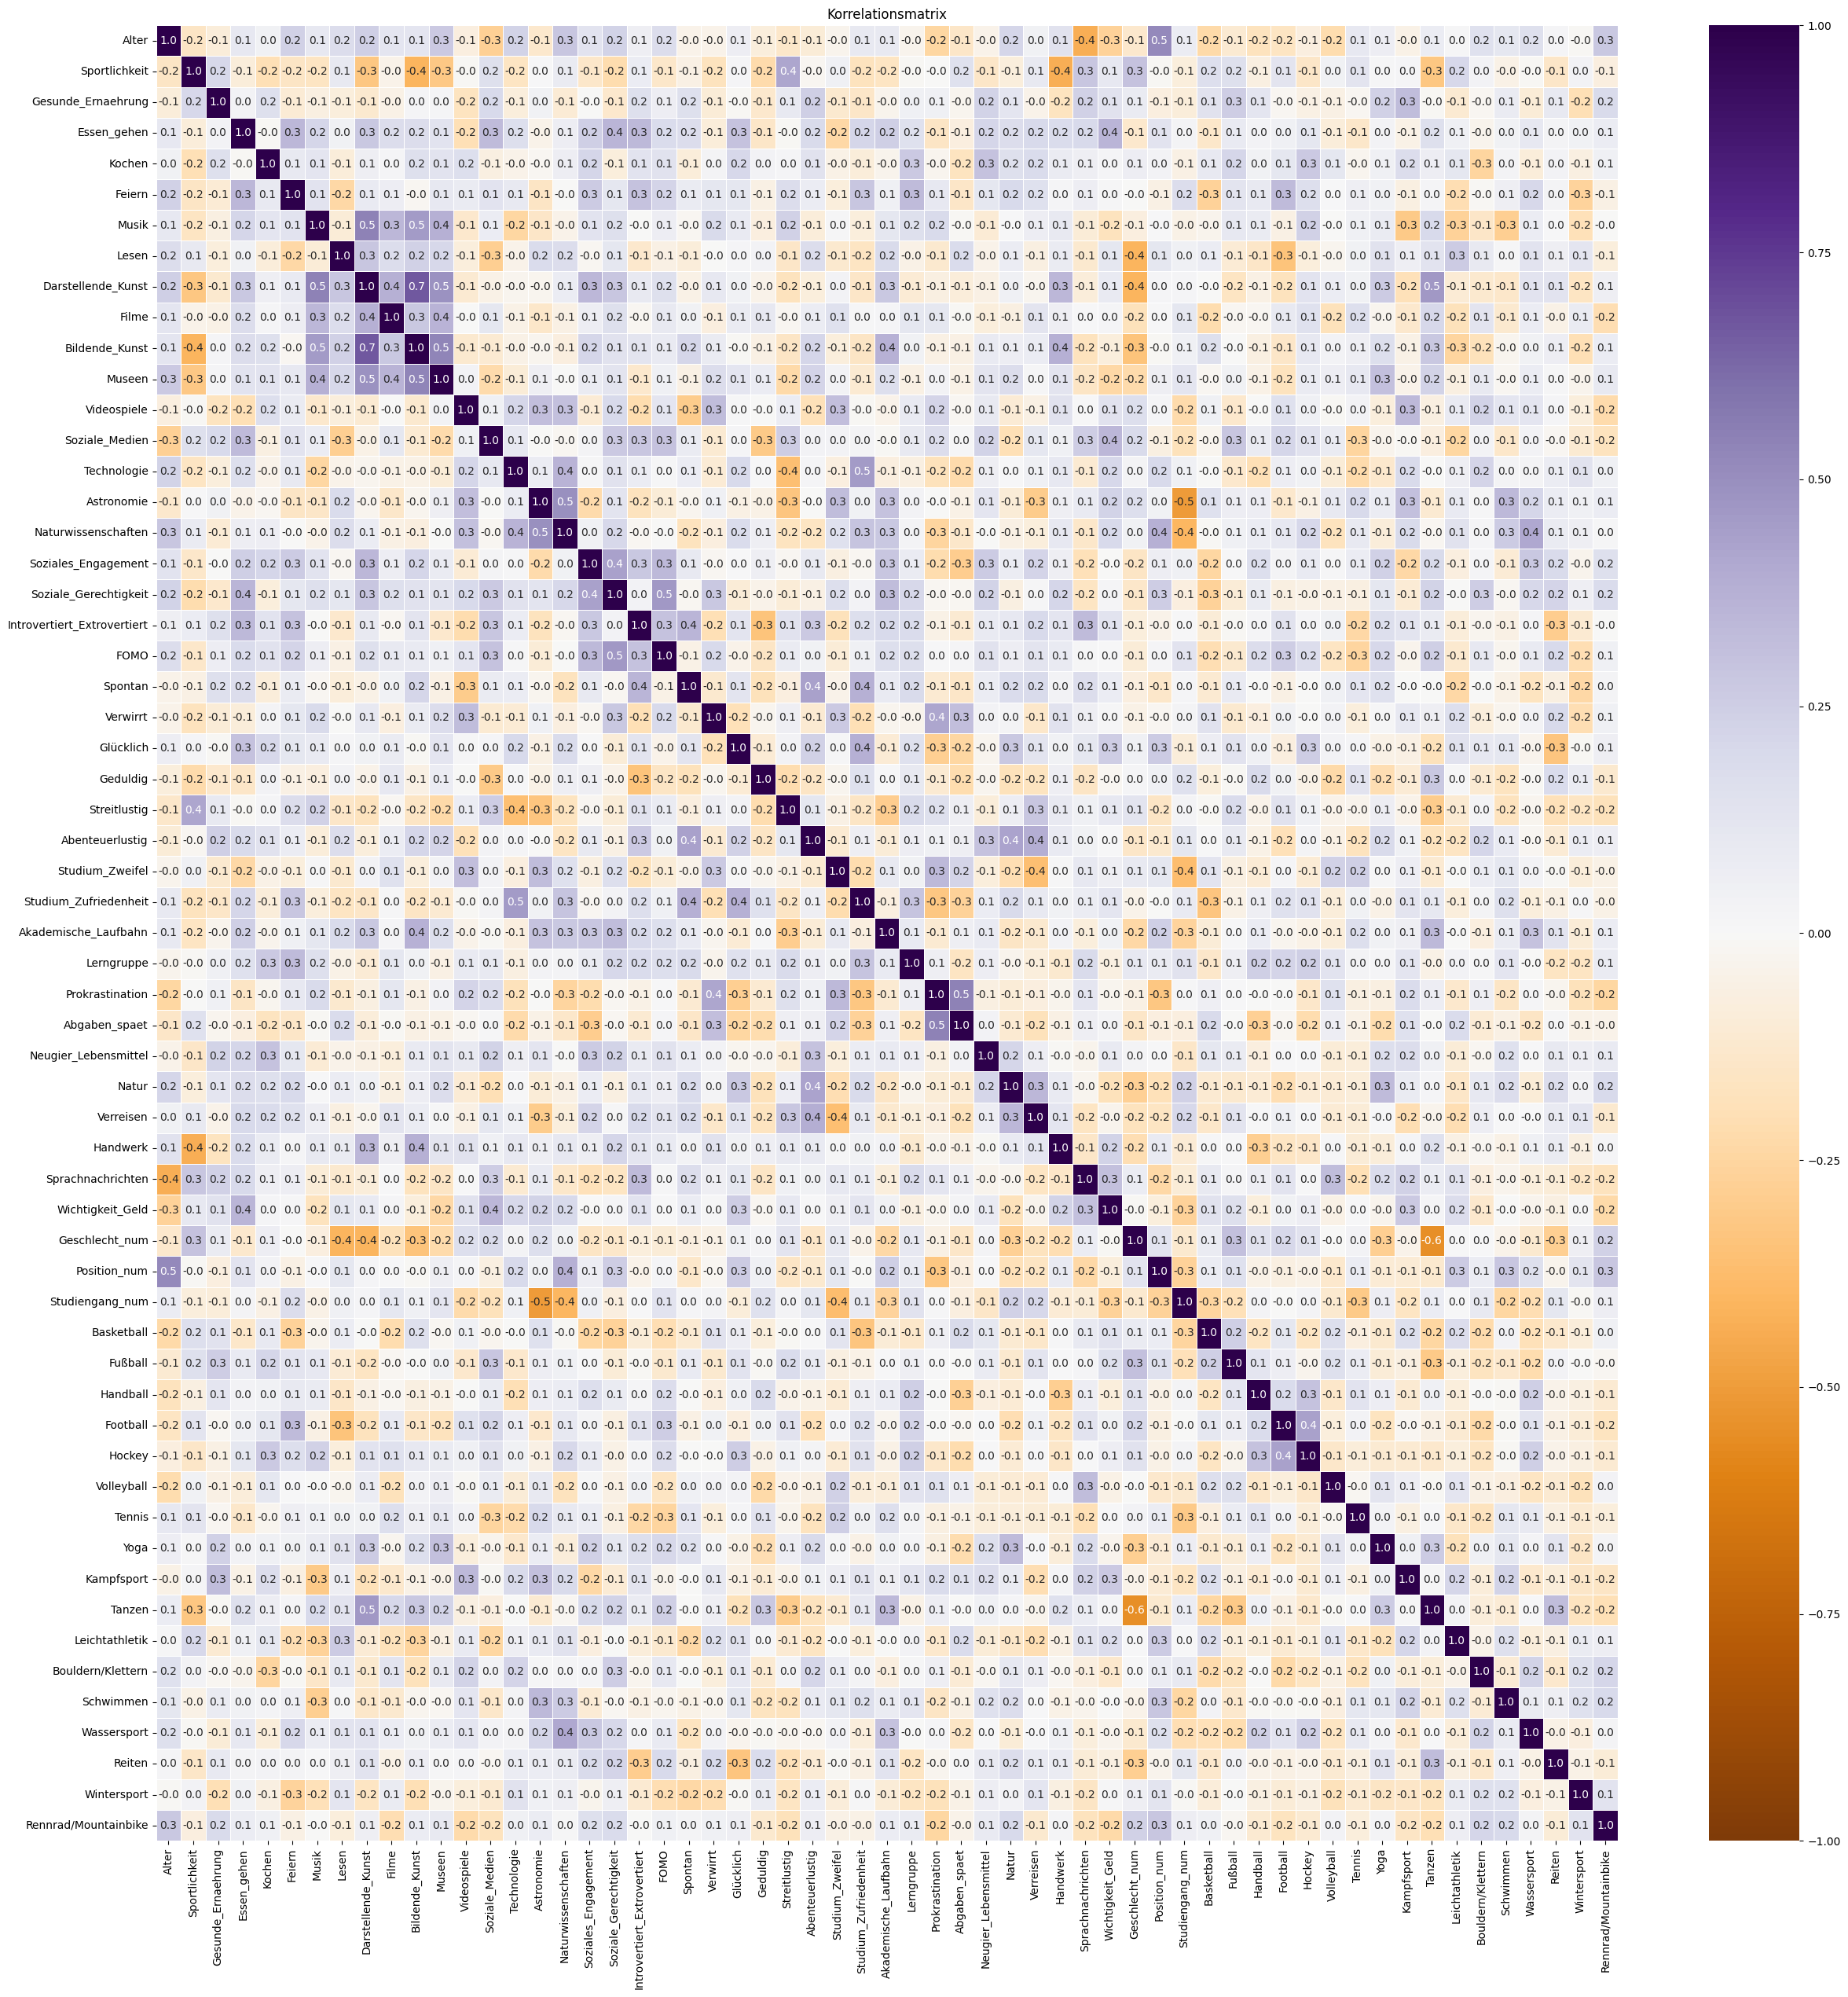

In [3]:
fig, ax = plt.subplots(figsize=(30, 30))
plt.title('Korrelationsmatrix')
correlation_matrix = data.corr() # Pearson-Korrelationskoeffizient
sb.heatmap(correlation_matrix, ax=ax, annot=True, vmin=-1, vmax=1, fmt=".1f", cmap="PuOr", linewidth=0.5)

### Filterung
Da aufgrund der hoch-dimensionalen Daten die Korrelationsmatrix schwer lesbar dargestellt wird, reduzieren wir die Korrelationsmatrix auf alle Korrelationen die im Wertebereich <=-0.4 und >=0.4 liegen, sowie die Diagonale mit dem trivialen Wert von 1.0.

<AxesSubplot:title={'center':'Korrelationsmatrix (gefiltert)'}>

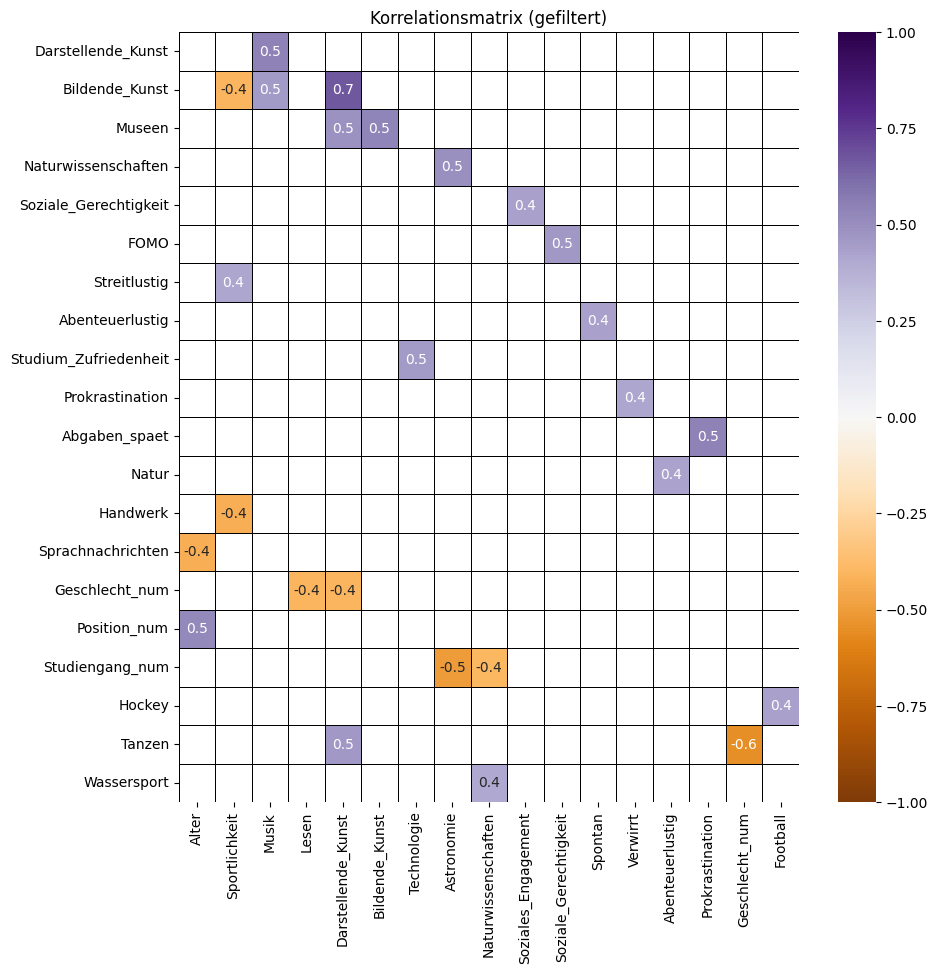

In [4]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Korrelationsmatrix (gefiltert)')

lower_tri = correlation_matrix.where(np.tril(np.ones(correlation_matrix.shape), k=-1).astype(bool))
# keep only values under -0.4 and over 0.4
filtered_corr_matrix = correlation_matrix[(lower_tri <= -0.4) | (lower_tri >= 0.4)]
# remove all nan columns
filtered_corr_matrix = filtered_corr_matrix.dropna(axis=0, how='all')
filtered_corr_matrix = filtered_corr_matrix.dropna(axis=1, how='all')

sb.heatmap(filtered_corr_matrix, ax=ax, annot=True, vmin=-1, vmax=1, fmt=".1f", cmap="PuOr", linewidth=0.5, linecolor="black")

## Ranking
Nun erstellen wir ein Ranking der stärksten Korrelationen und Anti-Korrelationen.
### Korrelationen über 0.4

In [5]:
# Nur die Tupel heraussuchen, die hohe Korrelation haben
# Extract correlations over 0.4 
condition = (filtered_corr_matrix > 0.4)
row_indices, col_indices = np.where(condition)
corr_dict = {}

# Access the corresponding rows and columns
for row_idx, col_idx in zip(row_indices, col_indices):
    row_name = filtered_corr_matrix.index[row_idx]
    col_name = filtered_corr_matrix.columns[col_idx]
    corr_dict[row_name + ' und ' + col_name] = filtered_corr_matrix.iloc[row_idx, col_idx]

sorted_corr_dict = dict(sorted(corr_dict.items(), key=lambda item: item[1], reverse=True))
for i, key in enumerate(sorted_corr_dict):
    print(str(i+1) + '. ' + key + ': ' + str(sorted_corr_dict[key]))

1. Bildende_Kunst und Darstellende_Kunst: 0.6651297916995409
2. Abgaben_spaet und Prokrastination: 0.5452593420939706
3. Darstellende_Kunst und Musik: 0.5414742211588621
4. Museen und Bildende_Kunst: 0.5373993635581167
5. Position_num und Alter: 0.5230013795908686
6. Naturwissenschaften und Astronomie: 0.4983895364226694
7. Museen und Darstellende_Kunst: 0.48792997665078114
8. Tanzen und Darstellende_Kunst: 0.4644834969915345
9. FOMO und Soziale_Gerechtigkeit: 0.4631551376095586
10. Bildende_Kunst und Musik: 0.46071639527477354
11. Studium_Zufriedenheit und Technologie: 0.45762978662362097
12. Abenteuerlustig und Spontan: 0.4347409628003631
13. Hockey und Football: 0.4346599176528584
14. Soziale_Gerechtigkeit und Soziales_Engagement: 0.43030127569096166
15. Natur und Abenteuerlustig: 0.42701478564293366
16. Streitlustig und Sportlichkeit: 0.42151957725029965
17. Prokrastination und Verwirrt: 0.4188753220353485
18. Wassersport und Naturwissenschaften: 0.41220440454368285


### Anti-Korrelationen unter -0.4

In [6]:
# Nur die Tupel heraussuchen, die niedrige Korrelation haben
# Extract correlations under -0.4 
condition = (filtered_corr_matrix < -0.4)
row_indices, col_indices = np.where(condition)
corr_dict = {}

# Access the corresponding rows and columns
for row_idx, col_idx in zip(row_indices, col_indices):
    row_name = filtered_corr_matrix.index[row_idx]
    col_name = filtered_corr_matrix.columns[col_idx]
    corr_dict[row_name + ' und ' + col_name] = filtered_corr_matrix.iloc[row_idx, col_idx]

sorted_corr_dict = dict(sorted(corr_dict.items(), key=lambda item: item[1]))
for i, key in enumerate(sorted_corr_dict):
    print(str(i+1) + '. ' + key + ': ' + str(sorted_corr_dict[key]))

1. Tanzen und Geschlecht_num: -0.5513661078227865
2. Studiengang_num und Astronomie: -0.5039354612509522
3. Sprachnachrichten und Alter: -0.43647261974361773
4. Handwerk und Sportlichkeit: -0.4335630162060763
5. Bildende_Kunst und Sportlichkeit: -0.4139553899669205
6. Geschlecht_num und Darstellende_Kunst: -0.41153839343895204
7. Geschlecht_num und Lesen: -0.4069782547999729
8. Studiengang_num und Naturwissenschaften: -0.40012349757817944


## Einordnung
Zunächst werden die Ergebnisse aus dem Korrelations-Ranking für eine genauere Einordnung nach Thema aufteilt. Korrelationen innerhalb eines Themenbereichs halten wir allerdings für wenig aussagekräftig, deswegen fokusieren wir uns besonders auf Korrelationen die Themenübergreifend sind.
### Aufteilung nach Thema
|   | Kreatives und Geschlecht                                           |   | Kreatives und Sport                                    |   | Studium und Science                                           |
|---|--------------------------------------------------------------------|---|--------------------------------------------------------|---|---------------------------------------------------------------|           
| 1 | Darstellende_Kunst und Bildende_Kunst: 0.6651297916995409          | 1 | Sportlichkeit und Bildende_Kunst: -0.4139553899669205  | 1 | Studium_Zufriedenheit und Technologie: 0.45762978662362097    |  
| 2 | Darstellende_Kunst und Musik: 0.5414742211588621                   | 2 | Sportlichkeit und Handwerk: -0.4335630162060763        | 2 | Studiengang_num und Naturwissenschaften: -0.40012349757817944 |  
| 3 | Bildende_Kunst und Museen: 0.5373993635581167                      | 3 | Sportlichkeit und Streitlustig: 0.42151957725029965    | 3 | Studiengang_num und Astronomie: -0.5039354612509522           |
| 4 | Darstellende_Kunst und Museen: 0.48792997665078114                 | 4 |                                                        | 4 |                                                               |
| 5 | Darstellende_Kunst und Tanzen: 0.4644834969915345                  | 5 |                                                        | 5 |                                                               |
| 6 | Bildende_Kunst und Musik: 0.46071639527477354                      | 6 |                                                        | 6 |                                                               |
| 7 | Geschlecht_num und Lesen: -0.4069782547999729                      | 7 |                                                        | 7 |                                                               |
| 8 | Geschlecht_num und Darstellende_Kunst: -0.41153839343895204        | 8 |                                                        | 8 |                                                               |
| 9 | Geschlecht_num und Tanzen: -0.5513661078227865                     | 9 |                                                        | 9 |                                                               |
|   |                                                                    |   |                                                        |   |                                                               |
|   | **Sport und Science**                                              |   | **Position an der HSD und Alter**                      |   | **Kommunikation und Alter**                                   | 
| 1 | Wassersport und Naturwissenschaften: 0.41220440454368285           | 1 | Position_num und Alter: 0.5230013795908686             | 1 | Sprachnachrichten und Alter: -0.43647261974361773             |
|   |                                                                    |   |                                                        |   |                                                               |
|   | **Soziales**                                                       |   | **Zu ähnlich/kaum aussagekräftig**                     |   |
| 1 | Soziale_Gerechtigkeit und FOMO: 0.4631551376095586                 | 1 | Abgaben_spaet und Prokrastination: 0.5452593420939706  |   |
| 2 | Soziale_Gerechtigkeit und Soziales_Engagement: 0.43030127569096166 | 2 | Prokrastination und Verwirrt: 0.4188753220353485       |   |
| 3 |                                                                    | 3 | Hockey und Football: 0.4346599176528584                |   |
| 4 |                                                                    | 4 | Naturwissenschaften und Astronomie: 0.4983895364226694 |   |
| 5 |                                                                    | 5 | Abenteuerlustig und Spontan: 0.4347409628003631        |   |
| 6 |                                                                    | 6 | Natur und Abenteuerlustig: 0.42701478564293366         |   |

### Anstellen von Hypothesen
Durch diese Einordnung fällt auf, das besonders kreative und sportliche Interessen mit dem Geschlecht zusammenhängen könnten. Für die weitere Analyse stellen wir deswegen folgende Hypothesen auf:
- Personen die sich als weiblich einordnen haben eher kreative Interessen
- Personen die kreative Interessen haben sind eher unsportlich
- Personen die sich als sportlich einordnen sind eher Streitlustig
- -> Sind dann Personen die sich als sportlich einordnen eher männlich?

Weitere Beobachtungen:
- Personen sind eher mit ihrem Studium im FB Medien zufrieden, wenn sie an Technologie interessiert sind
- Die Position an der HSD ist mit dem Alter verknüpft
- Ältere Personen mögen keine Sprachnachrichten

Um diese Hypothesen weiter zu untersuchen werden einige dieser Zusammenhänge im Folgenden als Plot dargestellt.

## Darstellung der Zusammenhänge
### Kreative und sportliche Interessen nach Geschlecht
- Personen die sich als weiblich einordnen haben eher kreative Interessen
- Personen die kreative Interessen haben sind eher unsportlich
- Personen die sich als sportlich einordnen sind eher Streitlustig
- -> Sind dann Personen die sich als sportlich einordnen eher männlich?

#### Pair-Plot: Kreative Interessen nach Geschlecht

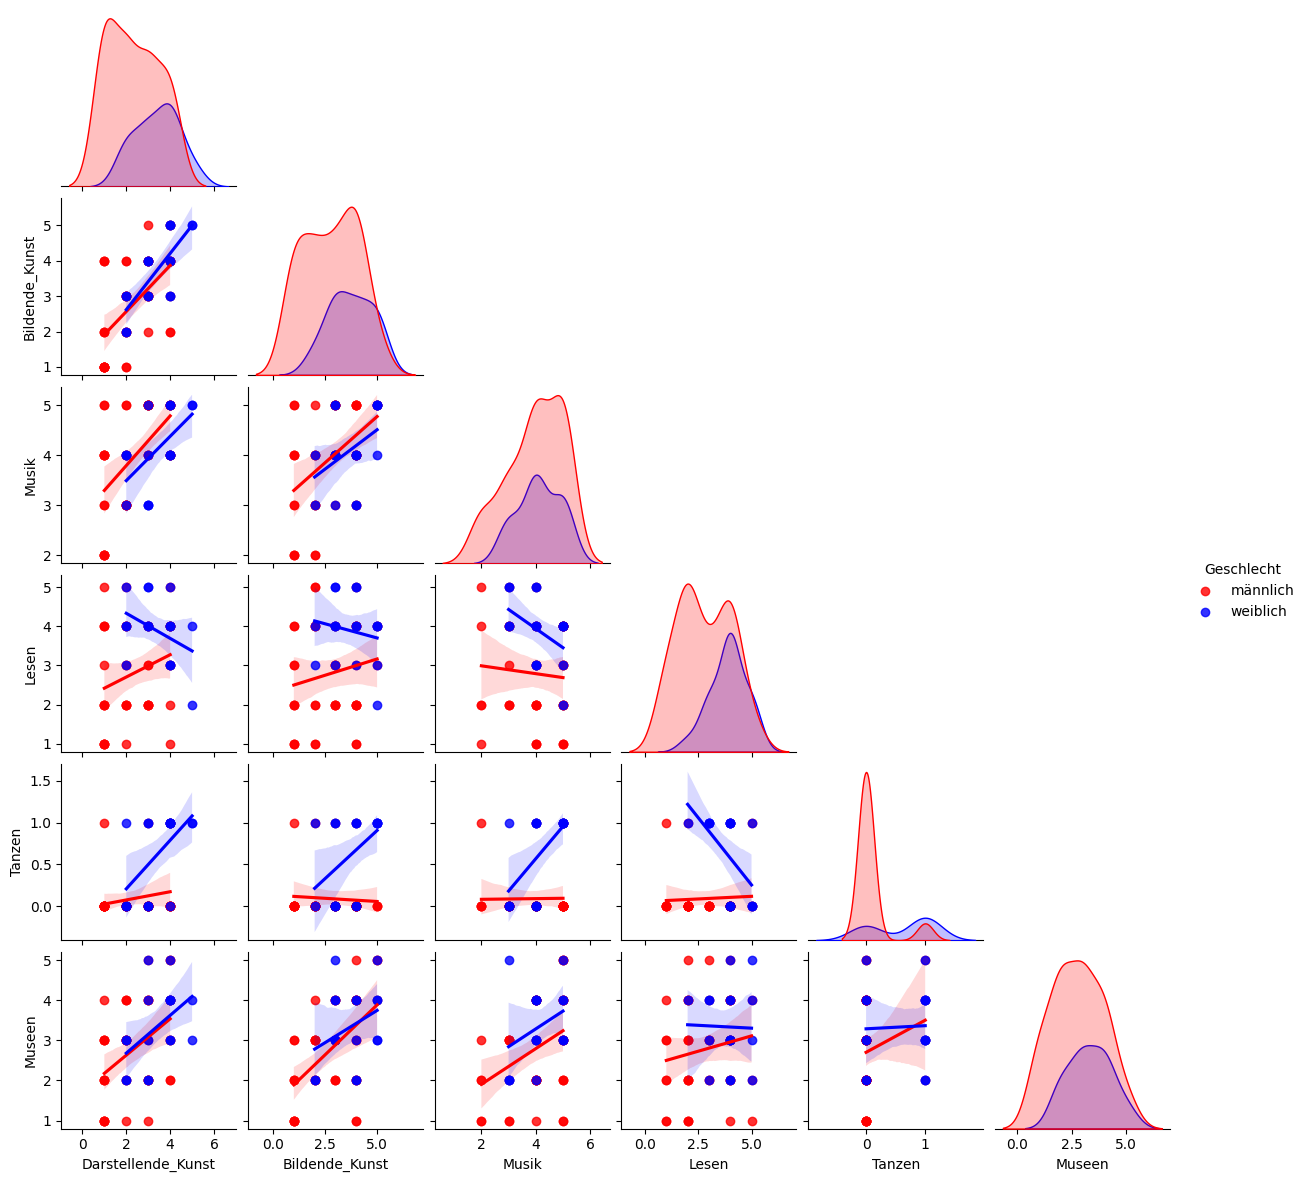

In [7]:
interessen = ['Darstellende_Kunst', 'Bildende_Kunst', 'Musik', 'Lesen', 'Tanzen', 'Museen']
sb.pairplot(
      data, hue='Geschlecht', kind='reg', height=2, 
      vars=interessen, palette=["red", "blue"], corner=True
)

#### Violin-Plot: Kreative Interessen nach Geschlecht
- Arithmetisches Mittel/Mean (weißer Punkt)
- Dichte/Density
- IQR Interquartilsbereich (dünne Linie), Mittlere 50% der Daten (dickere Linie)

<AxesSubplot:xlabel='Bildende_Kunst', ylabel='Darstellende_Kunst'>

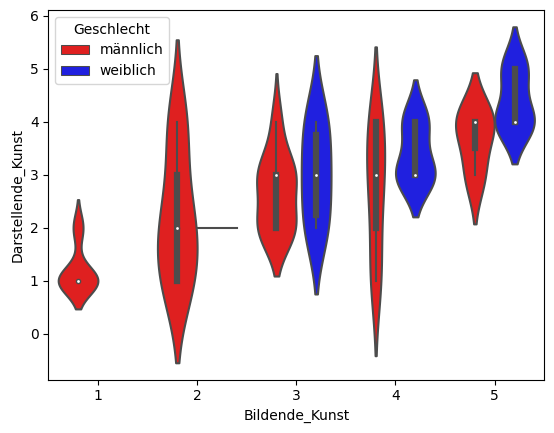

In [8]:
sb.violinplot(data=data, x="Bildende_Kunst", y="Darstellende_Kunst", hue="Geschlecht", palette=["red", "blue"])

#### Pair-Plot: Kreative Interessen und Sportlichkeit nach Geschlecht

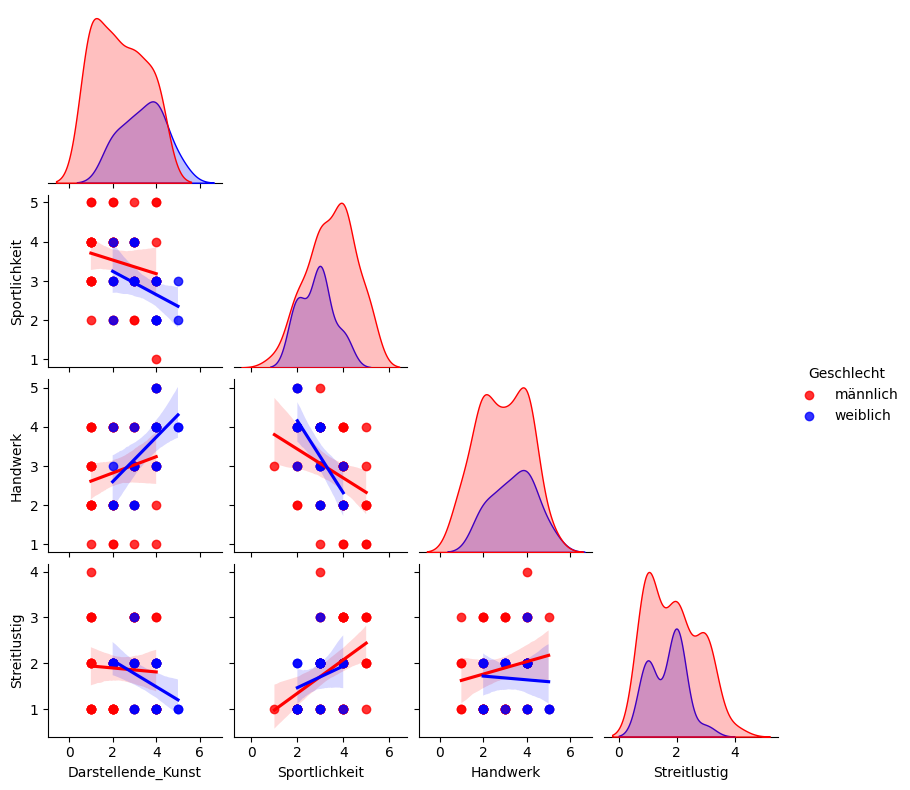

In [10]:
interessen = ['Darstellende_Kunst', 'Sportlichkeit', 'Handwerk', 'Streitlustig']
sb.pairplot(
      data, hue='Geschlecht', kind='reg', height=2, 
      vars=interessen, palette=["red", "blue"], corner=True
)

#### Pair-Plot: Sportlichkeit und Streitlustigkeit nach Geschlecht

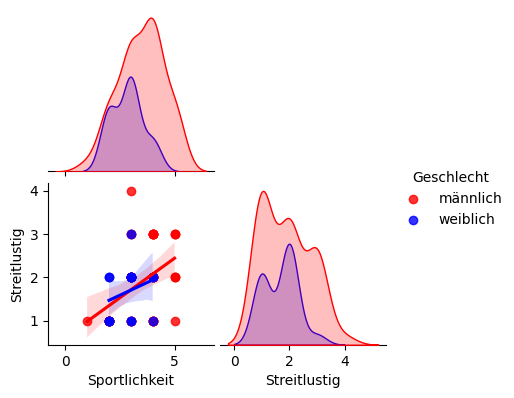

In [16]:
eigenschaften = ['Sportlichkeit', 'Streitlustig']
sb.pairplot(
      data, hue='Geschlecht', kind='reg', height=2, 
      vars=eigenschaften, palette=["red", "blue"], corner=True
)

### Zufriedenheit im Studium und Technologie-Interesse
- Personen sind eher mit ihrem Studium im FB Medien zufrieden, wenn sie an Technologie interessiert sind

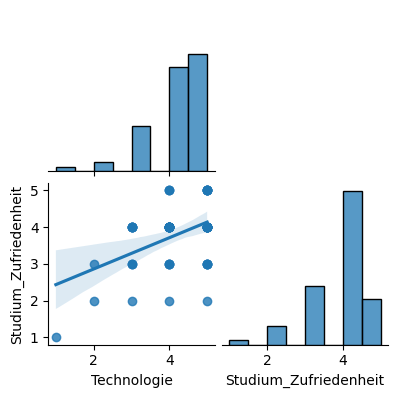

In [18]:
eigenschaften = ['Technologie', 'Studium_Zufriedenheit']
sb.pairplot(
      data, kind='reg', height=2, 
      vars=eigenschaften, corner=True
)

### Position an der HSD und Alter
- Die Position an der HSD ist mit dem Alter verknüpft
- Position
    - 0 = Student\*in
    - 1 = Wissenschaftliche\*r Mitarbeiter\*in
    - 2 = Dozent\*in
- Die Position ist aber kaum aussagekräftig da kaum andere Daten als die von Studierenden vorhanden sind

<AxesSubplot:xlabel='Position_num', ylabel='Alter'>

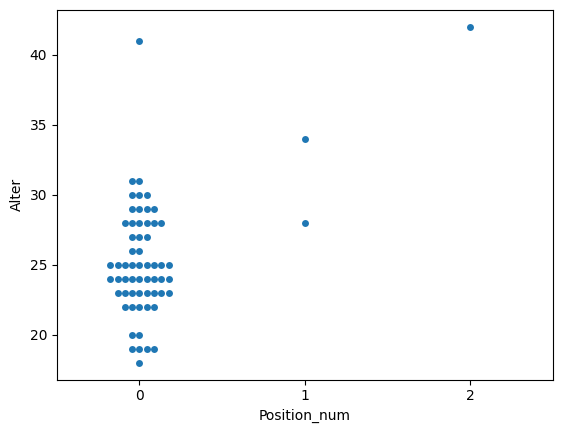

In [13]:
sb.swarmplot(data=data, x="Position_num", y="Alter")

### Kommunikation und Alter
- Ältere Personen mögen keine Sprachnachrichten
- Zwei starke Ausreißer erkennbar

<AxesSubplot:xlabel='Sprachnachrichten', ylabel='Alter'>

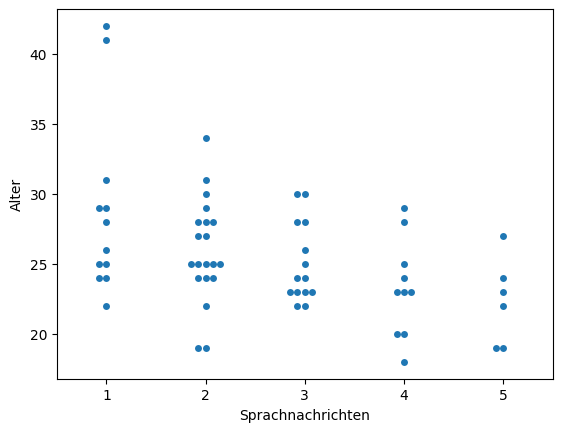

In [14]:
sb.swarmplot(data=data, x="Sprachnachrichten", y="Alter")

## Fazit
Die Analyse der Korrelationen lieferte einige Anhaltspunkte für bestehende Zusammenhänge zwischen den Featuren. Dennoch waren die festgestellten Korrelationen nicht so hoch, um auf eindeutig identische Variablen hinzuweisen. Daher lieferte die Korrelationsanalyse nur begrenzte Hinweise für eine sinnvolle Feature-Auswahl zur Dimensionsreduzierung. Ein Ansatz zur Dimensionsreduzierung könnte es sein, die Feature zu kreativen und sportlichen Aktivitäten jeweils zu einen Kreativitäts- und einen Sportlichkeits-Koeffizienten zusammenzufassen.